# Individual Conditional Expectation (ICE)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Loading the data

In [24]:
df = pd.read_excel("../data/dataproject2024.xlsx")

df.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


### Training the model

In [25]:
features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 
            'Loan duration', 'Monthly payment', 'Credit event', 'Married', 
            'Homeowner', 'Group']
X = df[features]  
y = df['Pred_default (y_hat)']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Applying ICE

In [19]:
# feature_name = 'Age'
# target_variable = 'PD'

# feature_range = np.linspace(df[feature_name].min(), df[feature_name].max(), num=100)

In [26]:
# def generate_ice_data(df, feature_name, feature_range):
#     ice_data = []
#     for _, row in df.iterrows():
#         row_copy = row.copy()
#         ice_lines = []
#         for value in feature_range:
#             row_copy[feature_name] = value
#             ice_lines.append(row_copy[features].copy())  
#         ice_data.append(ice_lines)
#     return pd.concat([pd.DataFrame(ice_lines) for ice_lines in ice_data], axis=0)  

# ice_data = generate_ice_data(df, feature_name, feature_range)

# def predict_ice_data(ice_data, model):
#     predictions = []
#     for ice_row_set in ice_data:
#         predictions_for_row = model.predict_proba(ice_row_set)[:, 1] 
#         predictions.append(predictions_for_row)
#     return predictions

# ice_predictions = predict_ice_data(ice_data, model)

# def plot_ice_curves(ice_predictions, feature_range, num_curves=10):
#     plt.figure(figsize=(10, 6))
#     for i in range(min(len(ice_predictions), num_curves)):  
#         plt.plot(feature_range, ice_predictions[i], alpha=0.5)
    
#     plt.xlabel(f'{feature_name}')
#     plt.ylabel('Predicted PD')
#     plt.title(f'ICE Plot for {feature_name}')
#     plt.show()

# plot_ice_curves(ice_predictions, feature_range)

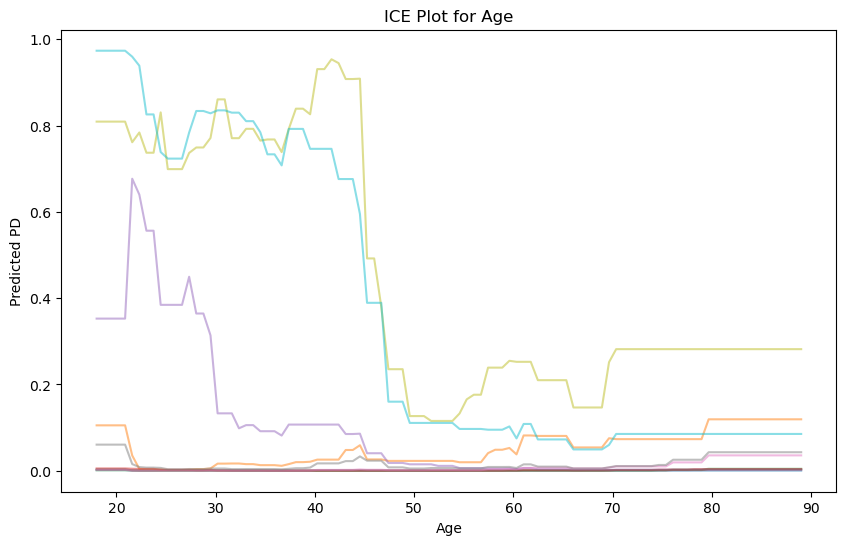

In [22]:
features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 
            'Loan duration', 'Monthly payment', 'Credit event', 'Married', 
            'Homeowner', 'Group']

feature_name = 'Age'
target_variable = 'PD'

feature_range = np.linspace(df[feature_name].min(), df[feature_name].max(), num=100)

def generate_ice_data(df, feature_name, feature_range):
    ice_data = []
    for _, row in df.iterrows():
        row_copy = row.copy()
        ice_lines = []
        for value in feature_range:
            row_copy[feature_name] = value
            ice_lines.append(row_copy[features].copy())  
        ice_data.append(ice_lines)
    return pd.concat([pd.DataFrame(ice_lines) for ice_lines in ice_data], axis=0)  

ice_data = generate_ice_data(df, feature_name, feature_range)

def predict_ice_data(ice_data, model, feature_range):
    predictions = []
    for i in range(0, len(ice_data), len(feature_range)):
        ice_row_set = ice_data.iloc[i:i+len(feature_range)]
        preds_for_row = model.predict_proba(ice_row_set)[:, 1] 
        predictions.append(preds_for_row)
    return predictions

ice_predictions = predict_ice_data(ice_data, model, feature_range)

def plot_ice_curves(ice_predictions, feature_range, num_curves=10):
    plt.figure(figsize=(10, 6))
    for i in range(min(len(ice_predictions), num_curves)): 
        plt.plot(feature_range, ice_predictions[i], alpha=0.5)
    
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Predicted PD')
    plt.title(f'ICE Plot for {feature_name}')
    plt.show()

plot_ice_curves(ice_predictions, feature_range)

Generating ICE plots:   9%|▉         | 1/11 [10:27<1:44:37, 627.80s/it]C:\Users\user\AppData\Local\Temp\ipykernel_24956\2734021420.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_cols, idx + 1)  # Subplot for each feature
Generating ICE plots:  18%|█▊        | 2/11 [20:40<1:32:52, 619.19s/it]C:\Users\user\AppData\Local\Temp\ipykernel_24956\2734021420.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_cols, idx + 1)  # Subplot for each feature
Generating ICE plots:  27%|██▋       | 3/11 [31:00<1:22:33, 619.22s/it]C:\Users\user\AppData\Local\Temp\ipykernel_24956\2734021420.py:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed t

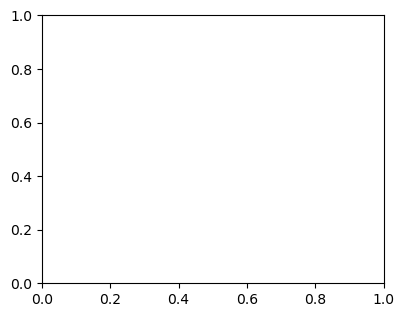

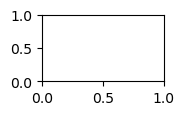

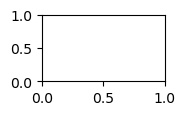

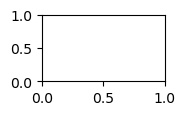

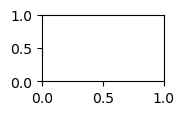

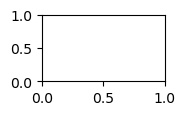

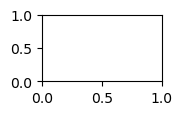

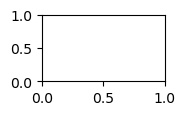

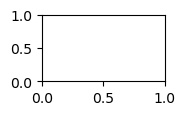

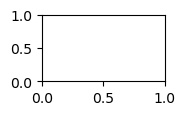

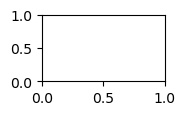

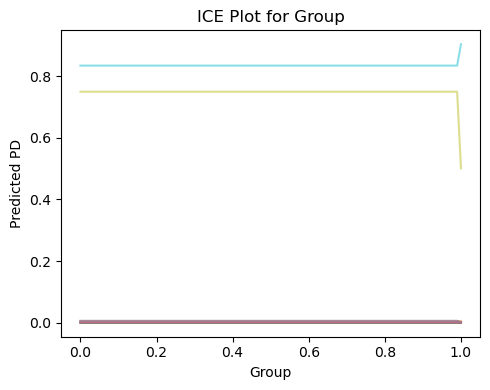

In [27]:
# Define the features and target variable
features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 
            'Loan duration', 'Monthly payment', 'Credit event', 'Married', 
            'Homeowner', 'Group']
target_variable = 'PD'

# Function to generate ICE data for a specific feature
def generate_ice_data(df, feature_name, feature_range):
    ice_data = []
    for _, row in df.iterrows():
        row_copy = row.copy()
        ice_lines = []
        for value in feature_range:
            row_copy[feature_name] = value
            ice_lines.append(row_copy[features].copy())  
        ice_data.append(ice_lines)
    return pd.concat([pd.DataFrame(ice_lines) for ice_lines in ice_data], axis=0)  

# Function to predict ICE data using a model
def predict_ice_data(ice_data, model, feature_range):
    predictions = []
    for i in range(0, len(ice_data), len(feature_range)):
        ice_row_set = ice_data.iloc[i:i+len(feature_range)]
        preds_for_row = model.predict_proba(ice_row_set)[:, 1]  # Assuming binary classification
        predictions.append(preds_for_row)
    return predictions

# Function to plot ICE curves for a specific feature
def plot_ice_curves(ice_predictions, feature_range, feature_name, num_curves=10):
    plt.figure(figsize=(5, 4))
    for i in range(min(len(ice_predictions), num_curves)): 
        plt.plot(feature_range, ice_predictions[i], alpha=0.5)
    
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Predicted PD')
    plt.title(f'ICE Plot for {feature_name}')
    plt.tight_layout()

# Loop through all features to generate and plot ICE plots with progress bar
def plot_all_ice_curves(df, features, model):
    n_features = len(features)
    n_cols = 3  # Number of plots per row
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate rows required

    plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size based on the number of features
    
    # Add tqdm progress bar here
    for idx, feature_name in enumerate(tqdm(features, desc="Generating ICE plots")):
        feature_range = np.linspace(df[feature_name].min(), df[feature_name].max(), num=100)
        ice_data = generate_ice_data(df, feature_name, feature_range)
        ice_predictions = predict_ice_data(ice_data, model, feature_range)

        plt.subplot(n_rows, n_cols, idx + 1)  # Subplot for each feature
        plot_ice_curves(ice_predictions, feature_range, feature_name)

    plt.show()

# Call the function to plot ICE plots for all features with progress tracking
plot_all_ice_curves(df, features, model)